In [5]:
import os
from bs4 import BeautifulSoup
import pandas as pd
from src.najdi_rok import najdi_rok
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [7]:
df = pd.read_parquet("data/cnb_vyber.parquet")
df['rok'] = df["008"].apply(lambda x: najdi_rok(x))

In [8]:
bestsellery = pd.read_json(os.path.join("data","sckn_zebricky.json"))

In [13]:
df['020_a']

001
68868             [80-238-3703-6]
angl01291                    None
angl01627a                   None
bk190000512                  None
bk190900003                  None
                       ...       
web20162835615               None
zb00389                      None
zb9203190                    None
zb9300147         [83-214-0575-4]
zb9545664         [0-7970-3137-5]
Name: 020_a, Length: 858061, dtype: object

In [15]:
df = df.explode('020_a')

In [21]:
df['isbn'] = df['020_a'].apply(lambda x: ''.join([l for l in str(x) if l.isnumeric()]))

In [23]:
df['isbn']

001
68868             8023837036
angl01291                   
angl01627a                  
bk190000512                 
bk190900003                 
                     ...    
web20162835615              
zb00389                     
zb9203190                   
zb9300147         8321405754
zb9545664         0797031375
Name: isbn, Length: 881161, dtype: object

In [25]:
df.sample(20)

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,080_a,100_4,100_7,100_a,100_d,240_l,245_a,245_c,245_n,245_p,246_a,250_a,250_b,260_a,260_b,260_c,260_e,260_f,260_ind1,264_a,264_b,264_c,264_ind2,300_a,300_b,300_c,490_a,490_v,500_a,521_a,546_a,648_a,650_a,650_x,650_y,650_z,651_a,653_a,655_a,700_4,700_7,700_a,700_d,710_4,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,isbn
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk194700992,980709s1946 xr cze,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,In memoriam Jana Týmla /,[Sborník na paměť Jana Týmla uspořádal kruh je...,None,None,None,[I. vydání],None,[Praha :],"[Dělnické nakladatelství,]",[1946],None,[(Cíl)],None,None,None,None,None,[53-[III] s. :],[[X] obr. příl. ;],[4°],None,None,"[S obálkou od L. Sváška, V grafické úpravě A. ...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,nam a22 1 4500,1946.0,
ck9007792,910131s1990 xr u0|0 | cze,None,[30 Kčs],[(Brož.) :],None,None,None,None,None,None,"[82-98, 885.0.03, 882-1]",[aut],xx0053500,"Vaněčková, Galina,",1930-,None,"Poezia, simvol, perevod /",Galina Vanečkova,None,None,None,[1. vyd.],None,[Praha :],"[Univerzita Karlova,]",[1990],[(Příbram :],[TZ 66)],None,None,None,None,None,[213 s. ;],None,[20 cm],"[Acta Universitatis Carolinae. Philologica, Mo...",[CXI - 1990],"[700 výt., Obálka Petr Vaneček, Přehl. lit, Če...",None,[Tištěno azbukou],None,None,None,None,None,None,None,[studie],None,None,None,None,None,None,None,None,[Acta Universitatis Carolinae.],None,[poezie ruská - poezie sovětská - symboly poet...,nam a22 4500,1990.0,
bk196904925,971208s1969 xr 000 | cze,None,None,[(Brožováno)],None,None,None,None,None,None,[016:908.410],[com],mzk2002165499,"Havířová, Helena,",1942-,None,Na cestu do Anglie /,sestavily Helena Bayerová a Jarmila Šteflíčková,None,None,None,None,None,None,None,None,None,None,None,[V Brně :],"[Krajská knihovna J. Mahena,]",[1969],[1],[16 stran ;],None,[22 cm],None,None,[Název z obálky],None,None,None,None,None,None,None,None,None,None,[com],[jk01131190],"[Šteflíčková, Jarmila,]",[1926-2001],None,None,None,None,None,None,[Angličtina - učebnice - bibliografie výběrové...,nam a22 1i 4500,1969.0,
cpk20041326644,040730s2004 xr e 000 0 cze,80-7243-216-8,"[Kč 198,00]",[(váz.) :],[cze],[ger],1,None,[94(47)],[Dějiny zemí východní Evropy],"[323.282, 321.74, 141.82, 328/329, (47+57), (0...",[aut],mzk2004245764,"Baberowski, Jörg,",1961-,None,Rudý teror :,Jörg Baberowski ; [přeložil Jiří Pondělíček],None,None,None,[1. vyd.],None,[Praha :],"[Brána,]",[2004],None,None,None,None,None,None,None,[221 s. ;],None,[22 cm],None,None,[Přeloženo z němčiny],None,None,[1925-1953],"[stalinismus, státní terorismus, komunistický ...",None,None,"[None, Sovětský svaz, Sovětský svaz, None, Sov...","[Sovětský svaz, Soviet Union]",None,"[studie, studies]",None,None,None,None,None,None,None,None,None,None,None,nam a22 a 4500,2004.0,8072432168
nkc20223419732,220506s2022 xr a e f 000 0 cze,978-80-7490-258-1,None,[(brožováno)],None,None,None,None,[615.8],[Fyzioterapie. Psychoterapie. Alternativní lék...,"[633.88, 615.89:633.88, 615.8, 615.45, 133.4, ...",[aut],None,"Fröhlichová, Martina",None,None,Čarodějnická ordinace :,napsala: Martina Fröhlichová ; nakreslila: Amá...,None,None,None,[První vydání],None,None,None,None,None,None,None,[[Litomyšl] :],"[H.R.G. spol. s r.o.,]",[2022],[1],[81 stran :],[barevné ilustrace ;],[21 cm],None,None,None,None,None,None,"[léčivé rostliny, fytoterapie, léčitelství, lé...",None,None,None,None,None,"[příručky, kuchařské recepty, handbooks and ma...",[ill],None,"[Kotasová, Amálka]",None,None,None,None,None,None,None,None,nam a22 i 4500,2022.0,9788074902581
cpk20041412348,040914s2004 xr g 000 f cze,80-7211-169-8,"[Kč 198,00]",[(brož.) :],[cze],[ger],1,None,[821.112.2-3],"[Německá próza, německy psaná]","[821.112.2-31, (0:82-31)]",[aut],xx0023090,"Tondern, Harald,",1941-,None,Bílý anděl :,Harald Tondern ;

In [10]:
bestsellery

,sckn_kategorie,rok,tyden,sckn_isbn,sckn_autorstvo,sckn_titul,sckn_nakladatelstvi
0,beletrie,2002,3,8072033980,Eco Umberto,Baudolino,Argo
1,beletrie,2002,3,808597455X,Fieldingová Helen,Deník Bridget Jonesové,Aurora
2,beletrie,2002,3,8071854042,Ouředník Patrik,Europeana - stručné dějiny dvacátého věku,Paseka
3,beletrie,2002,3,8072032410,Coelho Paulo,Alchymista,Argo
4,beletrie,2002,3,8072990276,Fieldingová Helen,Bridget Jonesová - s rozumem v koncích,Aurora
...,...,...,...,...,...,...,...
35100,literatura pro děti a mládež,2024,41,9788024292526,Lauren Roberts,Bezmocná,Yoli
35101,literatura pro děti a mládež,2024,41,9788025368060,Rebecca Ross,Božští rivalové,Fragment
35102,literatura pro děti a mládež,2024,41,9788074987373,Nofreeusernames,Den po dni,CooBoo
35103,literatura pro děti a mládež,2024,41,9788025707135,David Walliams,Babička drsňačka,Argo


In [29]:
bestsellery = bestsellery.merge(df[['isbn','020_q']], left_on='sckn_isbn', right_on='isbn', how='left')

In [31]:
bestsellery

,sckn_kategorie,rok,tyden,sckn_isbn,sckn_autorstvo,sckn_titul,sckn_nakladatelstvi,isbn,020_q
0,beletrie,2002,3,8072033980,Eco Umberto,Baudolino,Argo,8072033980,[(váz.) :]
1,beletrie,2002,3,808597455X,Fieldingová Helen,Deník Bridget Jonesové,Aurora,NaN,NaN
2,beletrie,2002,3,8071854042,Ouředník Patrik,Europeana - stručné dějiny dvacátého věku,Paseka,8071854042,[(váz.)]
3,beletrie,2002,3,8072032410,Coelho Paulo,Alchymista,Argo,8072032410,[(vázáno)]
4,beletrie,2002,3,8072990276,Fieldingová Helen,Bridget Jonesová - s rozumem v koncích,Aurora,8072990276,[(váz.) :]
...,...,...,...,...,...,...,...,...,...
6031578,literatura pro děti a mládež,2024,41,9788024292526,Lauren Roberts,Bezmocná,Yoli,9788024292526,[(brožováno)]
6031579,literatura pro děti a mládež,2024,41,9788025368060,Rebecca Ross,Božští rivalové,Fragment,9788025368060,[(brožováno) :]
6031580,literatura pro děti a mládež,2024,41,9788074987373,Nofreeusernames,Den po dni,CooBoo,9788074987373,[(brožováno) :]
6031581,literatura pro děti a mládež,2024,41,9788025707135,David Walliams,Babička drsňačka,Argo,9788025707135,[(brož.)]


In [33]:
def zjisti_vazbu(q020):
    q020 = str(q020).lower()
    if 'váz' in q020:
        return "pevná"
    elif 'brož' in q020:
        return "brožovaná"
    else:
        return None

In [35]:
bestsellery['vazba'] = bestsellery['020_q'].apply(lambda x: zjisti_vazbu(x)).astype("category")

In [49]:
bestsellery = bestsellery[bestsellery['sckn_kategorie'] == 'beletrie']

<Axes: xlabel='rok'>

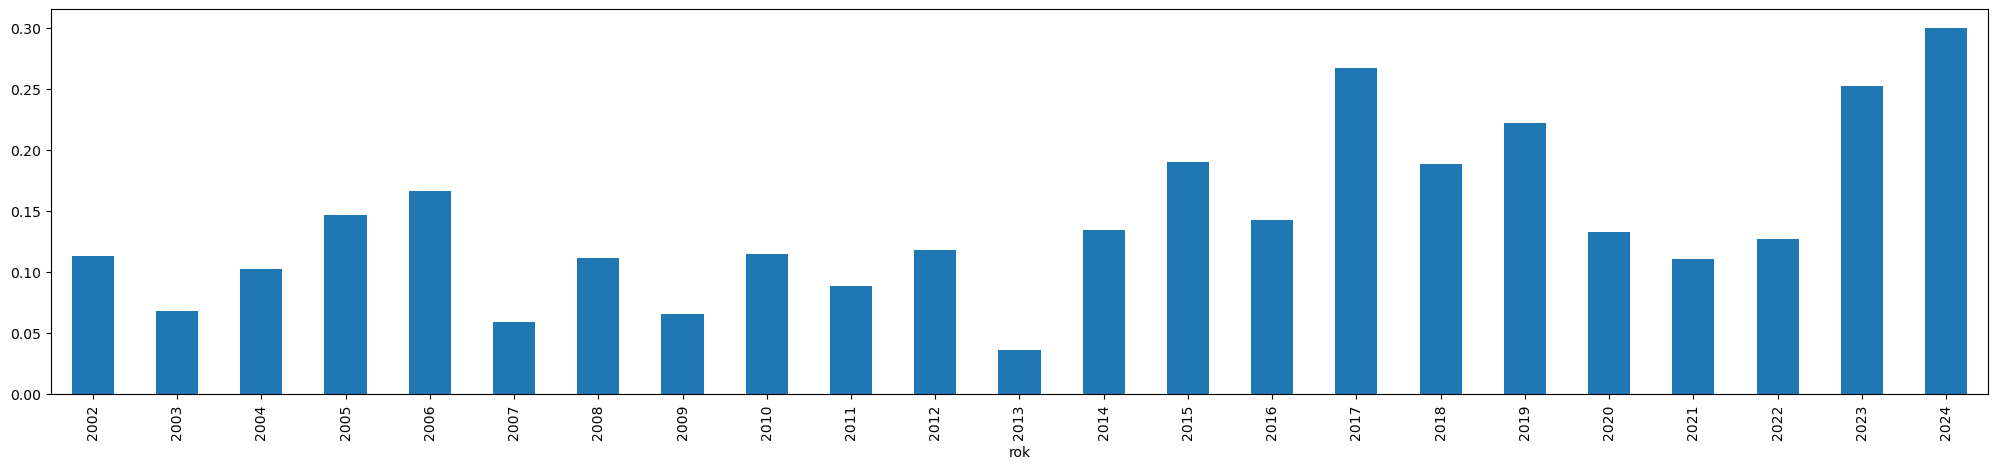

In [51]:
(bestsellery[bestsellery['vazba'] == 'brožovaná'].groupby('rok').size() / bestsellery.groupby('rok').size()).plot.bar(figsize=(25,5))

In [69]:
bestsellery[bestsellery['sckn_nakladatelstvi'] == 'Paseka'].drop_duplicates(subset=['sckn_autorstvo','sckn_titul'],keep='first').tail(30)

,sckn_kategorie,rok,tyden,sckn_isbn,sckn_autorstvo,sckn_titul,sckn_nakladatelstvi,isbn,020_q,vazba
440429,beletrie,2009,32,9788071859772,Munroová Alice,"Nepřítel, přítel, ctitel, milenec,manžel",Paseka,9788071859772,[(váz.)],pevná
441186,beletrie,2010,3,9788071859987,Oz Amos,Příběh o lásce a tmě,Paseka,9788071859987,[(váz.)],pevná
441880,beletrie,2010,26,9788074320514,Votýpka Vladimír,Aristokrat,Paseka,9788074320514,[(váz.)],pevná
442305,beletrie,2010,40,978807185817X,Šabach Petr,Občanský průkaz,Paseka,NaN,NaN,NaN
443300,beletrie,2011,21,9788074320989,Sem-Sandberg Steve,Chudí v Lodži,Paseka,9788074320989,[(váz.)],pevná
444481,beletrie,2012,8,9788071858928,Mayesová Frances,Pod toskánským sluncem,Paseka,9788071858928,[(váz.)],pevná
444755,beletrie,2012,18,9788074321870,Šabach Petr,Máslem dolů,Paseka,9788074321870,[(váz.)],pevná
444913,beletrie,2012,23,9788074322105,"Pafko Pavel, Králík Jan",Šlo to skoro samo,Paseka,9788074322105,[(váz.)],pevná
446423,beletrie,2013,21,9788074323058,"Bergoglio Jorge, Skorka Abraham",O nebi a zemi,Paseka,9788074323058,[(váz.)],pevná
447714,beletrie,2014,12,9788074324512,Munroová Alice,Drahý život,Paseka,9788074324512,[(váz.)],pevná


In [63]:
bestsellery[bestsellery['vazba'] == 'brožovaná'].drop_duplicates(subset=['sckn_autorstvo','sckn_titul']).tail(20)

,sckn_kategorie,rok,tyden,sckn_isbn,sckn_autorstvo,sckn_titul,sckn_nakladatelstvi,isbn,020_q,vazba
6030872,beletrie,2024,18,9788076373990,Marek Torčík,Rozložíš paměť,Paseka,9788076373990,[(brožováno)],brožovaná
6030896,beletrie,2024,19,9788024953960,Hannah Grace,Na ledě,Ikar,9788024953960,[(brožováno)],brožovaná
6030897,beletrie,2024,19,9788027723713,Rina Kent,Černý rytíř,Red,9788027723713,[(brožováno)],brožovaná
6030898,beletrie,2024,19,9788027721115,Lynn Painter,Lepší než ve filmu,Red,9788027721115,[(brožováno)],brožovaná
6030983,beletrie,2024,22,9788024711027,Julie Caplinová,Vila v Itálii,Cosmopolis,9788024711027,[(brožováno) :],brožovaná
6031081,beletrie,2024,25,9788027801930,"František Kotleta , Kristýna Sněgoňová",Plameny války,Epocha,9788027801930,[(brožováno)],brožovaná
6031111,beletrie,2024,26,9788024953977,Elena Armas,Americký milostný experiment,Ikar,9788024953977,[(brožováno)],brožovaná
6031139,beletrie,2024,27,9788024954189,Colleen Hooverová,Příliš pozdě,Ikar,9788024954189,[(brožováno)],brožovaná
6031141,beletrie,2024,27,9788027801930,"František Kotleta, Kristýna Sněgoňová",Plameny války,Epocha,9788027801930,[(brožováno)],brožovaná
6031202,beletrie,2024,29,9788027153046,Bal Khabra,Zakázané uvolnění,Cosmopolis,9788027153046,[(brožováno) :],brožovaná


<Axes: xlabel='rok'>

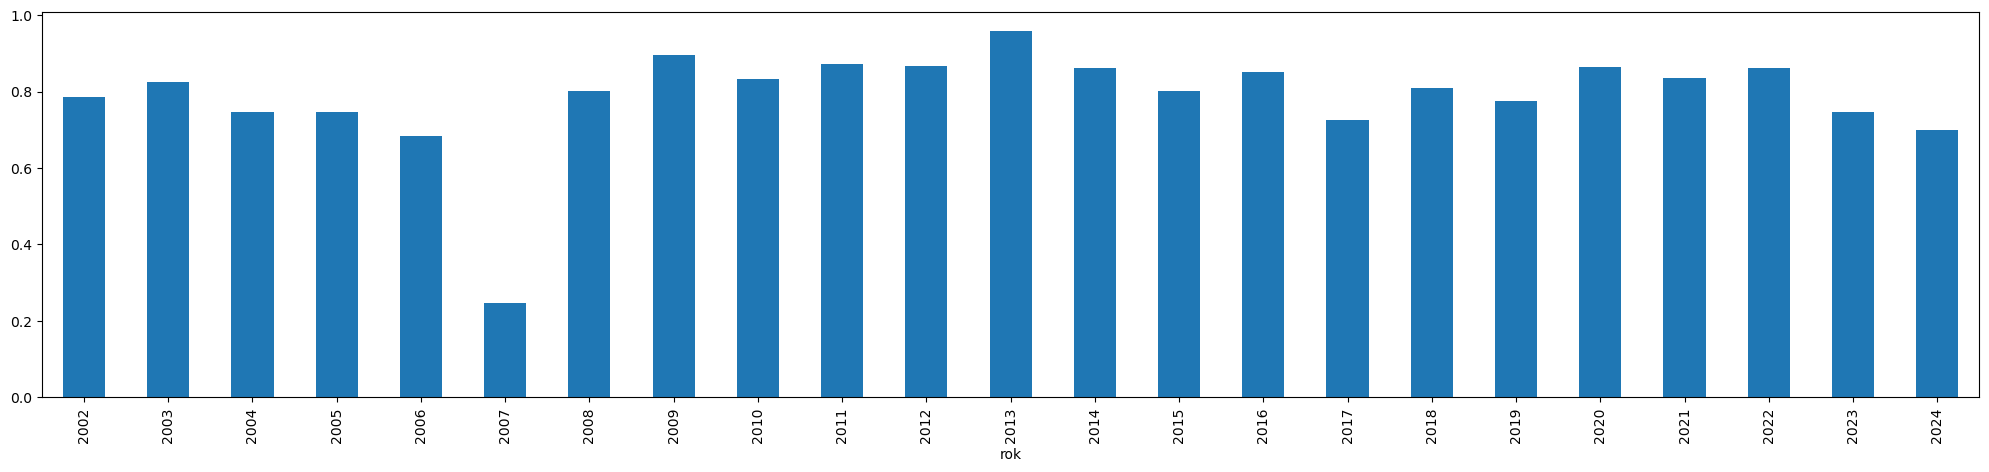

In [53]:
(bestsellery[bestsellery['vazba'] == 'pevná'].groupby('rok').size() / bestsellery.groupby('rok').size()).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

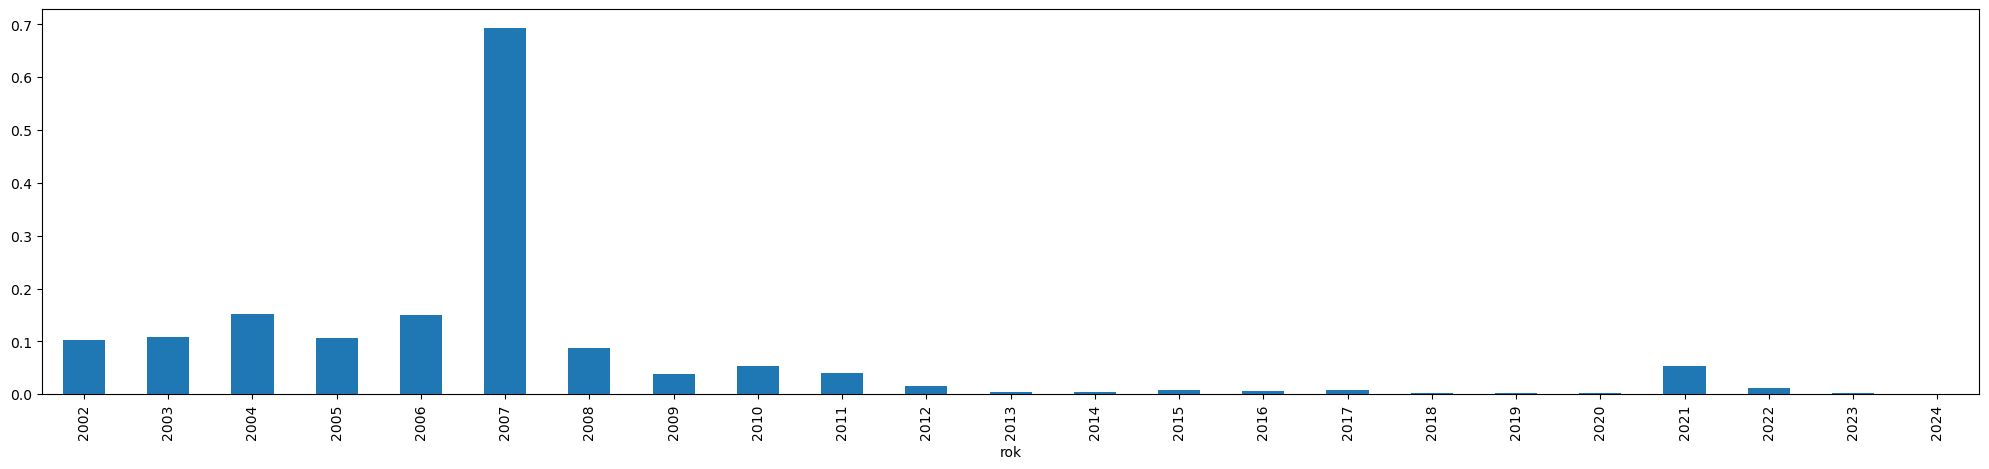

In [55]:
(bestsellery[bestsellery['vazba'].isnull()].groupby('rok').size() / bestsellery.groupby('rok').size()).plot.bar(figsize=(25,5))